In [5]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#load
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [9]:
train_images.shape,train_labels.shape

((60000, 28, 28), (60000,))

In [10]:
train_labels[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [11]:
def image_show(train_image,train_label,number):
    plt.imshow(train_image[number])
    plt.title(train_label[number])
    plt.show()

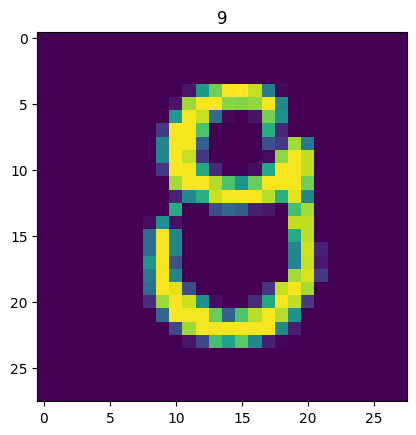

In [14]:
image_show(train_images,train_labels,80)

In [ ]:
#normalise
train_images=train_images/255.0
test_images=test_images/255.0
#train_images[0]


array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

In [18]:
#expand dimension to add a channel for gray scale image
train_images=train_images.reshape((60000,28,28,1))
test_images=test_images.reshape((10000,28,28,1))


In [19]:
#one hot encoding
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

In [21]:
# ##model define 
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), 
                        activation='relu',
                          input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
                metrics=['accuracy'])
model.summary()

c:\Users\parul\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
history=model.fit(
    train_images,
    train_labels,
    epochs=5,
    batch_size=64,
    validation_data=(test_images,test_labels),
    validation_split=0.1
)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 49s 46ms/step - accuracy: 0.5189 - loss: 1.3574 - val_accuracy: 0.9008 - val_loss: 0.3259
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 65s 69ms/step - accuracy: 0.9058 - loss: 0.3091 - val_accuracy: 0.9403 - val_loss: 0.1953
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 98s 105ms/step - accuracy: 0.9396 - loss: 0.1985 - val_accuracy: 0.9560 - val_loss: 0.1441
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 64s 69ms/step - accuracy: 0.9566 - loss: 0.1404 - val_accuracy: 0.9674 - val_loss: 0.1045
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 63s 67ms/step - accuracy: 0.9659 - loss: 0.1137 - val_accuracy: 0.9738 - val_loss: 0.0826
